In [1]:
import pandas as pd

df_comunas = pd.read_csv('data/ruralidad_comunas.csv', delimiter=';', quotechar='"', on_bad_lines='skip')
df_servel = pd.read_csv('data/VW_VOTARON_2020PLEB_Datos completos.csv', delimiter=';', quotechar='"', on_bad_lines='skip')

In [2]:
print(df_comunas.columns)


Index(['Cod_reg', 'Región', 'cod_com', 'Comuna', 'N° Habitantes', 'Km.2',
       'Densidad', 'Tipo_com', 'Clasificación', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


In [3]:
print(df_servel.columns)

Index(['Cedula', 'Circunscripcion', 'Comuna', 'DV', 'Edad', 'Nacionalidad',
       'Pais Domicilio', 'Pais Nacimiento', 'Partido', 'Provincia',
       'Rango Edad', 'Region', 'Sexo', 'Sufragio', 'VotoExterior',
       'Número de registros', 'Votaron'],
      dtype='object')


In [4]:
df_servel['Comuna'].unique().shape

(347,)

In [5]:
import pandas as pd
from unidecode import unidecode

# Filtrar las columnas necesarias
df_comunas = df_comunas[['Comuna', 'Clasificación']]
df_comunas = df_comunas.rename(columns={'Clasificación': 'clasificacion_comuna'})

# Convertir el nombre de las comunas a minúsculas para hacer un merge adecuado
df_comunas['Comuna'] = df_comunas['Comuna'].apply(lambda x: unidecode(x).lower())


# Limpiar los datos de Servel, asegurando que los valores de la columna 'Comuna' estén en minúsculas
df_servel['Comuna'] = df_servel['Comuna'].apply(lambda x: unidecode(x).lower() if isinstance(x, str) else 'NA')
df_servel = df_servel[df_servel['Comuna'] != 'NA']

# Hacer el merge entre el dataset del Servel y el de comunas, según la columna 'Comuna'
df_servel = df_servel.merge(df_comunas, on='Comuna', how='left')

# Calcular estadísticas según la clasificación de la comuna
classification_stats = df_servel['clasificacion_comuna'].value_counts(normalize=True) * 100

# Mostrar las estadísticas
print(classification_stats)


clasificacion_comuna
Urbana    72.948092
Rural     13.990083
Mixta     13.061825
Name: proportion, dtype: float64


In [6]:
df_servel['Comuna'].unique().shape
# Identificar las comunas que no coincidieron
comunas_no_coinciden = df_servel[df_servel['clasificacion_comuna'].isna()]['Comuna'].unique()
print("Comunas sin coincidencia:", comunas_no_coinciden)


Comunas sin coincidencia: ['cabo de hornos(ex-navarino)' 'trehuaco' 'marchigue' 'antartica']


clasificacion_comuna
Rural     39.883999
Mixta     46.097582
Urbana    53.702925
dtype: float64


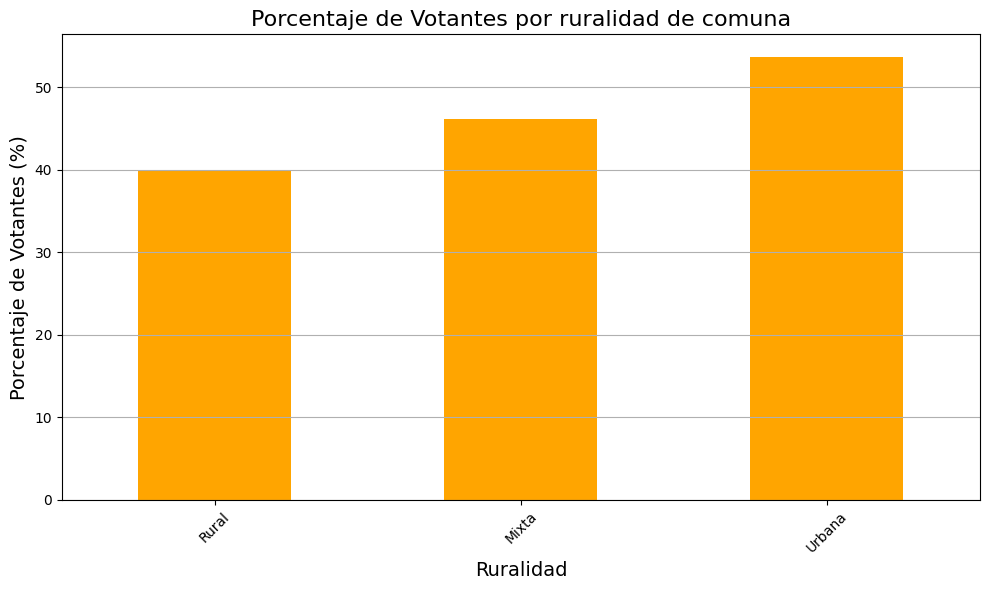

In [7]:
import matplotlib.pyplot as plt
# Filtrar los que votaron (donde 'Sufragio' es \"sufragó \")
df_votaron = df_servel[df_servel['Sufragio'].str.strip() == 'sufragó']

# Paso 1: Contar cuántas personas votaron en cada grupo de tipo de comuna
conteo_votos_por_grupo = df_votaron.groupby('clasificacion_comuna').size()

# Paso 2: Contar el total de personas en cada tipo de comuna
total_personas_por_grupo = df_servel.groupby('clasificacion_comuna').size()

# Paso 3: Calcular el porcentaje de votantes en cada grupo
porcentaje_votos_por_grupo = ((conteo_votos_por_grupo / total_personas_por_grupo) * 100).sort_values()

print(porcentaje_votos_por_grupo)


# Paso 6: Graficar
plt.figure(figsize=(10, 6))  # Tamaño de la figura
porcentaje_votos_por_grupo.plot(kind='bar', color='orange')

# Etiquetas y título
plt.title('Porcentaje de Votantes por ruralidad de comuna', fontsize=16)
plt.xlabel('Ruralidad', fontsize=14)
plt.ylabel('Porcentaje de Votantes (%)', fontsize=14)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.grid(axis='y')  # Agregar líneas de cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [8]:
df_servel.head()

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron,clasificacion_comuna
0,0,Coyhaique,coyhaique,0,22,chilena,Chile,Chile,[130] FEDERACION REGIONALISTA VERDE SOCIAL,Coyhaique,20-24,De Aysen Del General Carlos Ibañez Del Campo,femenino,sufragó,Nacional,1,1.0,Urbana
1,0,El Puerto,valparaiso,0,89,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,femenino,no sufragó,Nacional,1,NaN,Urbana
2,0,Iquique,iquique,0,99,chilena,Chile,Chile,SIN PARTIDO,Iquique,80 o +,De Tarapaca,masculino,no sufragó,Nacional,1,NaN,Urbana
3,0,Rio Tranquilo,rio ibanez,0,22,chilena,Chile,Chile,SIN PARTIDO,General Carrera,20-24,De Aysen Del General Carlos Ibañez Del Campo,masculino,sufragó,Nacional,1,1.0,Rural
4,0,El Puerto,valparaiso,0,95,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,masculino,no sufragó,Nacional,1,NaN,Urbana


In [9]:
columnas_a_cargar = ['COMUNA', 'P15']

df_censo = pd.read_csv('data/Microdato_Censo2017-Personas.csv', sep=";", usecols=columnas_a_cargar)

In [10]:
education_map = {
    1: 0,  # Sala cuna o jardín infantil
    2: 0,  # Prekínder
    3: 0,  # Kínder
    4: 0,  # Especial o diferencial
    5: 4,  # Educación básica
    6: 4,  # Primaria o preparatorio (sistema antiguo)
    7: 12, # Científico-humanista
    8: 12, # Técnica profesional
    9: 12, # Humanidades (sistema antiguo)
    10: 12, # Técnica comercial, industrial/normalista (sistema antiguo)
    11: 14.5, # Técnico superior (2-3 años)
    12: 17, # Profesional 5 años
    13: 19, # Magíster
    14: 23, # Doctorado
    98: None, # No aplica
    99: None  # Missing (hay alrededor de 1.1M en estas ultimas 2 categorias)
}

In [11]:
df_censo = df_censo[df_censo['P15'] != 98]
df_censo = df_censo[df_censo['P15'] != 99]

In [12]:
df_censo['P15'] = df_censo['P15'].map(lambda x: education_map[x] if x in education_map else None)

In [13]:
df_censo.shape

(16479919, 2)

In [14]:
promedio_escolaridad_comuna = df_censo.groupby('COMUNA')['P15'].mean().sort_values(ascending=False)

In [15]:
df_16comunas = pd.read_csv('data/etiquetas_persona_comuna_16r.csv', sep=";")

promedio_escolaridad_comuna.index = promedio_escolaridad_comuna.index.map(lambda x: df_16comunas[df_16comunas['valor'] == x]['glosa'].values[0])

In [16]:
promedio_escolaridad_comuna = promedio_escolaridad_comuna.round()
promedio_escolaridad_comuna.index = promedio_escolaridad_comuna.index.map(lambda x: unidecode(x).lower())
promedio_escolaridad_comuna

COMUNA
antartica               15.0
providencia             14.0
las condes              14.0
vitacura                13.0
nunoa                   13.0
                        ... 
lumaco                   7.0
puqueldon                7.0
quemchi                  7.0
san juan de la costa     7.0
alto biobio              7.0
Name: P15, Length: 346, dtype: float64

In [17]:
df_promedio_escolaridad_comuna = promedio_escolaridad_comuna.reset_index()
df_promedio_escolaridad_comuna.rename(columns={'COMUNA': 'Comuna', 'P15': 'Promedio Escolaridad de Comuna'}, inplace=True)

In [18]:
df_servel = df_servel.merge(df_promedio_escolaridad_comuna, on='Comuna', how='left')

In [19]:
df_servel.shape
# Identificar las comunas que no coincidieron

(14796197, 19)

Vamos a hacer una distribución por años de estudio y cantidad, con votantes y no votantes

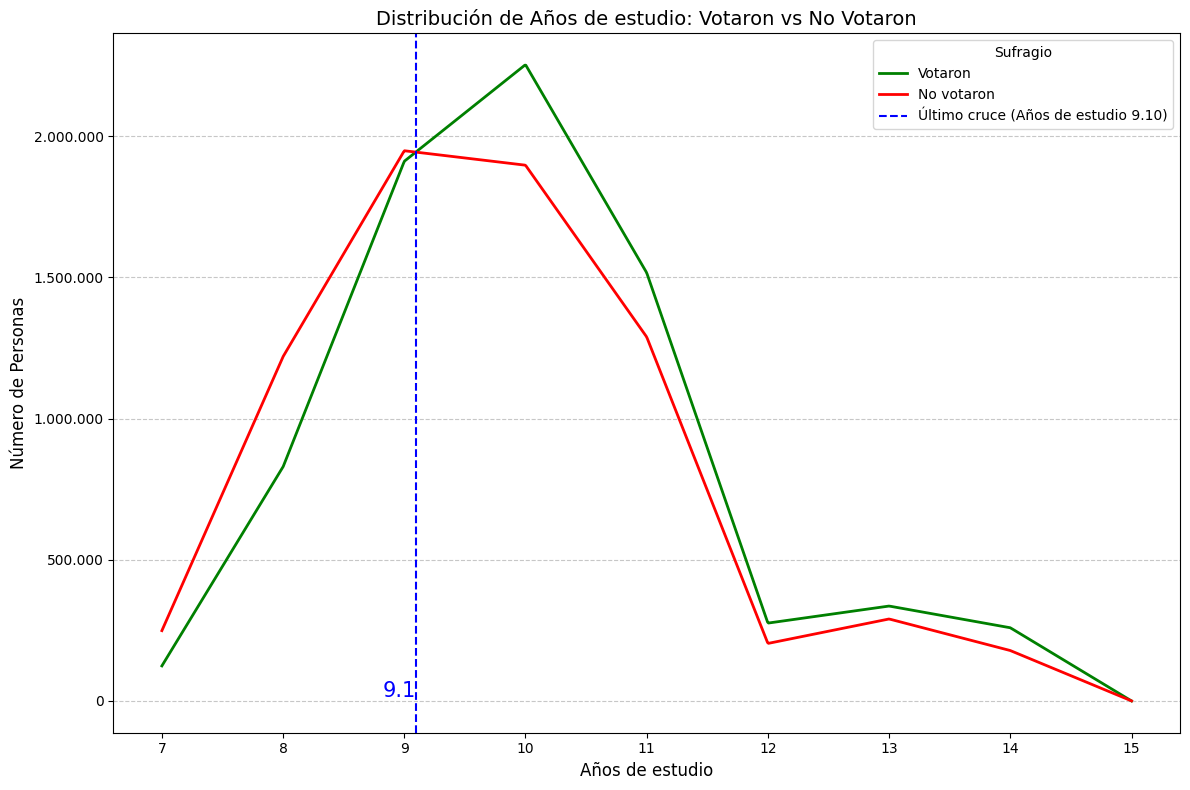

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filtrar datos según sufragio
votaron = df_servel[df_servel['Sufragio'].str.strip() == 'sufragó']
no_votaron = df_servel[df_servel['Sufragio'].str.strip() != 'sufragó']

# Contar la cantidad de personas por escolaridad para cada grupo
votaron_por_edad = votaron['Promedio Escolaridad de Comuna'].value_counts().sort_index()
no_votaron_por_edad = no_votaron['Promedio Escolaridad de Comuna'].value_counts().sort_index()

# Crear un rango continuo de años de estudio
x_values = np.linspace(votaron_por_edad.index.min(), votaron_por_edad.index.max(), 1000)

# Interpolar los datos
votaron_interpolado = np.interp(x_values, votaron_por_edad.index, votaron_por_edad.values)
no_votaron_interpolado = np.interp(x_values, no_votaron_por_edad.index, no_votaron_por_edad.values)

# Encontrar el punto exacto de cruce
punto_cruce = None
for i in range(len(x_values)):
    if votaron_interpolado[i] >= no_votaron_interpolado[i]:
        punto_cruce = x_values[i]
        break

# Crear el gráfico
plt.figure(figsize=(12, 8))

# Línea para los que votaron
plt.plot(x_values, votaron_interpolado, label='Votaron', color='green', linewidth=2)

# Línea para los que no votaron
plt.plot(x_values, no_votaron_interpolado, label='No votaron', color='red', linewidth=2)

# Agregar línea vertical punteada y el valor en azul en el eje X
if punto_cruce:
    plt.axvline(x=punto_cruce, color='blue', linestyle='--', label=f'Último cruce (Años de estudio {punto_cruce:.2f})')
    plt.text(punto_cruce, 0, f'{punto_cruce:.1f}', color='blue', fontsize=15, ha='right', va='bottom')

# Configurar el formato del eje Y con punto como separador de miles
def format_y_axis(value, tick_number):
    return f'{int(value):,}'.replace(',', '.')  # Cambiar las comas por puntos


plt.gca().yaxis.set_major_formatter(FuncFormatter(format_y_axis))

# Configurar el gráfico
plt.title('Distribución de Años de estudio: Votaron vs No Votaron', fontsize=14)
plt.xlabel('Años de estudio', fontsize=12)
plt.ylabel('Número de Personas', fontsize=12)
plt.legend(title='Sufragio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Promedio Escolaridad de Comuna
7.0     33.262658
8.0     40.473236
9.0     49.515661
10.0    54.289649
11.0    54.054083
12.0    57.514729
13.0    53.654826
14.0    59.217562
15.0    11.524164
dtype: float64


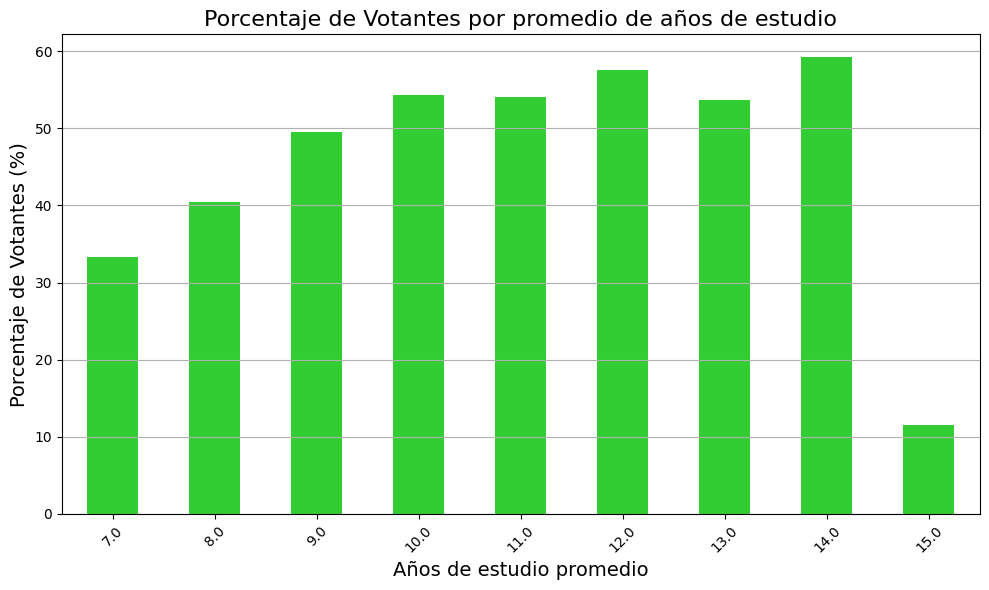

In [20]:
# Filtrar los que votaron (donde 'Sufragio' es \"sufragó \")
df_votaron = df_servel[df_servel['Sufragio'].str.strip() == 'sufragó']

# Paso 1: Contar cuántas personas votaron en cada grupo de tipo de comuna
conteo_votos_por_grupo = df_votaron.groupby('Promedio Escolaridad de Comuna').size()

# Paso 2: Contar el total de personas en cada tipo de comuna
total_personas_por_grupo = df_servel.groupby('Promedio Escolaridad de Comuna').size()

# Paso 3: Calcular el porcentaje de votantes en cada grupo
porcentaje_votos_por_grupo = ((conteo_votos_por_grupo / total_personas_por_grupo) * 100).sort_index()

print(porcentaje_votos_por_grupo)
import matplotlib.pyplot as plt

# Paso 6: Graficar
plt.figure(figsize=(10, 6))  # Tamaño de la figura
porcentaje_votos_por_grupo.plot(kind='bar', color='limegreen')

# Etiquetas y título
plt.title('Porcentaje de Votantes por promedio de años de estudio', fontsize=16)
plt.xlabel('Años de estudio promedio', fontsize=14)
plt.ylabel('Porcentaje de Votantes (%)', fontsize=14)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.grid(axis='y')  # Agregar líneas de cuadrícula en el eje y
plt.tight_layout()  # Ajustar el diseño
plt.show()

In [21]:
df_servel.head()

,Cedula,Circunscripcion,Comuna,DV,Edad,Nacionalidad,Pais Domicilio,Pais Nacimiento,Partido,Provincia,Rango Edad,Region,Sexo,Sufragio,VotoExterior,Número de registros,Votaron,clasificacion_comuna,Promedio Escolaridad de Comuna
0,0,Coyhaique,coyhaique,0,22,chilena,Chile,Chile,[130] FEDERACION REGIONALISTA VERDE SOCIAL,Coyhaique,20-24,De Aysen Del General Carlos Ibañez Del Campo,femenino,sufragó,Nacional,1,1.0,Urbana,9.0
1,0,El Puerto,valparaiso,0,89,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,femenino,no sufragó,Nacional,1,NaN,Urbana,11.0
2,0,Iquique,iquique,0,99,chilena,Chile,Chile,SIN PARTIDO,Iquique,80 o +,De Tarapaca,masculino,no sufragó,Nacional,1,NaN,Urbana,11.0
3,0,Rio Tranquilo,rio ibanez,0,22,chilena,Chile,Chile,SIN PARTIDO,General Carrera,20-24,De Aysen Del General Carlos Ibañez Del Campo,masculino,sufragó,Nacional,1,1.0,Rural,8.0
4,0,El Puerto,valparaiso,0,95,chilena,Chile,Chile,SIN PARTIDO,Valparaiso,80 o +,De Valparaiso,masculino,no sufragó,Nacional,1,NaN,Urbana,11.0


In [22]:
promedio_educacion = df_servel.groupby('Sufragio')['Promedio Escolaridad de Comuna'].mean()
print(promedio_educacion)

Sufragio
no sufragó     9.745423
sufragó       10.022777
Name: Promedio Escolaridad de Comuna, dtype: float64


Vimos que mientras más urbana la comuna, más porcentaje de votos tiene, pero
Mietras mas urbana la comunna, más educación tiene?

C:\Users\bastian\AppData\Local\Temp\ipykernel_3620\974179474.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_votaron['Nivel_Educacion'] = df_votaron['Promedio Escolaridad de Comuna'].apply(clasificar_nivel_educacion)


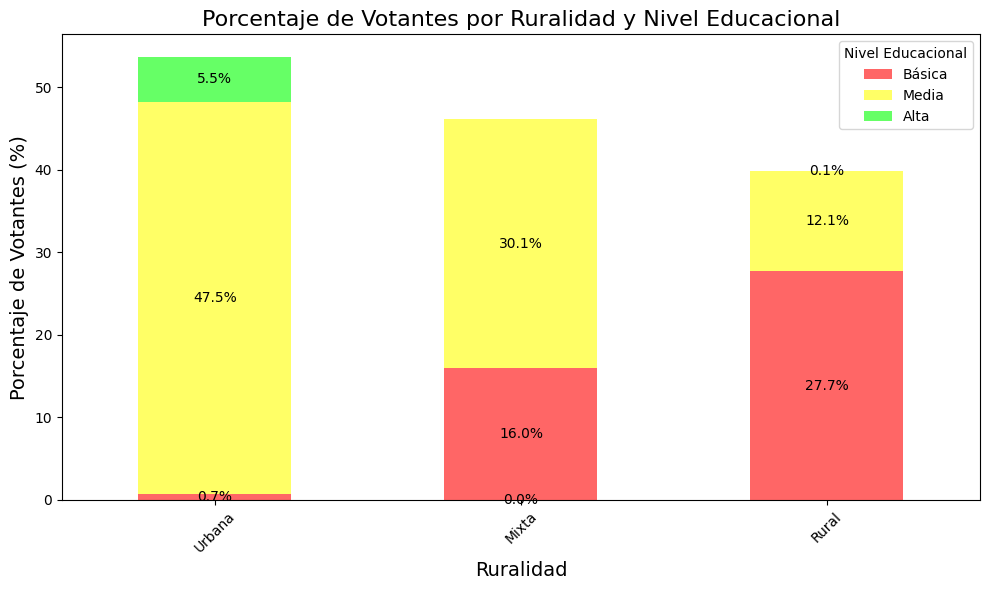

In [135]:
import matplotlib.pyplot as plt
import pandas as pd

# Supongamos que ya cargaste df_servel con las columnas necesarias
# Filtrar los que votaron (donde 'Sufragio' es "sufragó")
df_votaron = df_servel[df_servel['Sufragio'].str.strip() == 'sufragó']

# Paso 1: Clasificar los niveles educacionales
def clasificar_nivel_educacion(prom_educacion):
    if 0 <= prom_educacion <= 8:
        return 'Básica'
    elif 9 <= prom_educacion <= 12:
        return 'Media'
    elif 13 <= prom_educacion <= 18:
        return 'Alta'
    else:
        return 'Otro'

df_votaron['Nivel_Educacion'] = df_votaron['Promedio Escolaridad de Comuna'].apply(clasificar_nivel_educacion)

# Paso 2: Contar el total de personas en cada tipo de comuna
total_personas_por_grupo = df_servel.groupby('clasificacion_comuna').size()

# Paso 3: Calcular los porcentajes de nivel educativo dentro de cada grupo de ruralidad
porcentajes_nivel_educacion = df_votaron.groupby(['clasificacion_comuna', 'Nivel_Educacion']).size() / total_personas_por_grupo * 100
porcentajes_nivel_educacion = porcentajes_nivel_educacion.unstack().fillna(0)  # Rellenar valores NaN con 0

# Ordenar las categorías de nivel educativo para que el orden sea Básica, Media, Alta, Muy Alta
porcentajes_nivel_educacion = porcentajes_nivel_educacion[['Básica', 'Media', 'Alta']]

# Reordenar las filas del DataFrame para que Rural esté primero, Mixta en el medio y Urbana al final
porcentajes_nivel_educacion = porcentajes_nivel_educacion.reindex(['Urbana','Mixta','Rural'])

# Graficar con el nuevo orden
ax = porcentajes_nivel_educacion.plot(kind='bar', stacked=True, color=['#FF6666', '#FFFF66', '#66FF66'], figsize=(10, 6))

# Etiquetas y título
plt.title('Porcentaje de Votantes por Ruralidad y Nivel Educacional', fontsize=16)
plt.xlabel('Ruralidad', fontsize=14)
plt.ylabel('Porcentaje de Votantes (%)', fontsize=14)

# Añadir las etiquetas de porcentaje en cada sección de la barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='center', fontsize=10)

# Mostrar la gráfica
plt.xticks(rotation=45)
plt.legend(title='Nivel Educacional')
plt.tight_layout()
plt.show()


ahora hagamos el de educación por comuna


In [119]:
import geopandas as gpd
from unidecode import unidecode

# Lista de comunas de Santiago Urbano
comunas_santiago_urbano = [
    "colina", "lampa", "til til", "pirque", "puente alto", "san jose de maipo", "buin", 
    "calera de tango", "paine", "san bernardo", "alhue", "curacavi", "maria pinto", 
    "melipilla", "san pedro", "cerrillos", "cerro navia", "conchali", "el bosque", 
    "estacion central", "huechuraba", "independencia", "la cisterna", "la granja", 
    "la florida", "la pintana", "la reina", "las condes", "lo barnechea", "lo espejo", 
    "lo prado", "macul", "maipu", "nunoa", "pedro aguirre cerda", "penalolen", 
    "providencia", "pudahuel", "quilicura", "quinta normal", "recoleta", "renca", 
    "san miguel", "san joaquin", "san ramon", "santiago", "vitacura", "el monte", 
    "isla de maipo", "padre hurtado", "penaflor", "talagante"
]

# Cargar el shapefile de las comunas de Chile
mapa_comunas_santiago = gpd.read_file('comunas.shp')

# Normalizar nombres de las comunas en el shapefile
mapa_comunas_santiago['Comuna'] = mapa_comunas_santiago['Comuna'].apply(lambda x: unidecode(x).lower())

# Filtrar las comunas que pertenecen a Santiago Urbano
mapa_comunas_santiago = mapa_comunas_santiago[mapa_comunas_santiago['Comuna'].isin(comunas_santiago_urbano)]



In [120]:
df_servel['Comuna'] 

0            coyhaique
1           valparaiso
2              iquique
3           rio ibanez
4           valparaiso
               ...    
14796192       quilpue
14796193       quilpue
14796194       quilpue
14796195       quilpue
14796196       quilpue
Name: Comuna, Length: 14796197, dtype: object

In [121]:
# Calcular el promedio de pobreza por comuna

promedio_educacion_por_comuna = df_servel.groupby('Comuna')['Promedio Escolaridad de Comuna'].mean()

# Reiniciar el índice para obtener un DataFrame
promedio_educacion_por_comuna = promedio_educacion_por_comuna.reset_index()
promedio_educacion_por_comuna.columns = ['Comuna', 'PromedioEducacion']

In [128]:
# Unir el shapefile filtrado con los datos de porcentaje de voto
mapa_comunas_santiago_educacion = mapa_comunas_santiago
mapa_comunas_santiago_educacion = mapa_comunas_santiago_educacion.merge(promedio_educacion_por_comuna, on='Comuna', how='left')

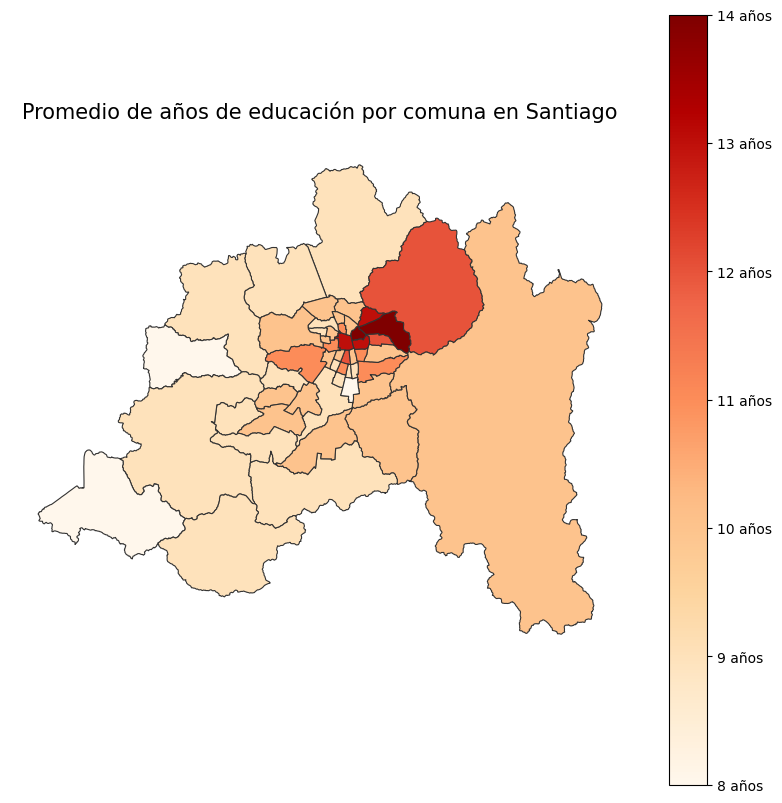

In [131]:
import matplotlib.pyplot as plt

# Crear el mapa
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
mapa_comunas_santiago_educacion.plot(column='PromedioEducacion', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.2')

# Títulos y etiquetas
plt.title('Promedio de años de educación por comuna en Santiago', fontsize=15)
ax.axis('off')
# Añadir la barra de color personalizada
sm = plt.cm.ScalarMappable(cmap='OrRd', norm=plt.Normalize(vmin=mapa_comunas_santiago_educacion['PromedioEducacion'].min(), vmax=mapa_comunas_santiago_educacion['PromedioEducacion'].max()))
sm._A = []  # Necesario para que funcione la barra de color
cbar = plt.colorbar(sm, ax=ax)
cbar.ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:.0f} años"))

plt.show()

Ahora con ruralidad


In [91]:
# Filtrar las columnas necesarias
df_clasificacion = df_servel[['Comuna', 'clasificacion_comuna']]



In [92]:
# Eliminar filas duplicadas
df_clasificacion = df_clasificacion.drop_duplicates()


In [93]:
# Verificar datos únicos por comuna
print(df_clasificacion['clasificacion_comuna'].unique())
print(df_clasificacion.head())


['Urbana' 'Rural' 'Mixta' nan]
         Comuna clasificacion_comuna
0     coyhaique               Urbana
1    valparaiso               Urbana
2       iquique               Urbana
3    rio ibanez                Rural
5  vina del mar               Urbana


In [94]:
import geopandas as gpd
from unidecode import unidecode

# Lista de comunas de Santiago Urbano
comunas_santiago_urbano = [
    "colina", "lampa", "til til", "pirque", "puente alto", "san jose de maipo", "buin", 
    "calera de tango", "paine", "san bernardo", "alhue", "curacavi", "maria pinto", 
    "melipilla", "san pedro", "cerrillos", "cerro navia", "conchali", "el bosque", 
    "estacion central", "huechuraba", "independencia", "la cisterna", "la granja", 
    "la florida", "la pintana", "la reina", "las condes", "lo barnechea", "lo espejo", 
    "lo prado", "macul", "maipu", "nunoa", "pedro aguirre cerda", "penalolen", 
    "providencia", "pudahuel", "quilicura", "quinta normal", "recoleta", "renca", 
    "san miguel", "san joaquin", "san ramon", "santiago", "vitacura", "el monte", 
    "isla de maipo", "padre hurtado", "penaflor", "talagante"
]

# Cargar el shapefile de las comunas de Chile
mapa_comunas_santiago = gpd.read_file('comunas.shp')

# Normalizar nombres de las comunas en el shapefile
mapa_comunas_santiago['Comuna'] = mapa_comunas_santiago['Comuna'].apply(lambda x: unidecode(x).lower())

# Filtrar las comunas que pertenecen a Santiago Urbano
mapa_comunas_santiago = mapa_comunas_santiago[mapa_comunas_santiago['Comuna'].isin(comunas_santiago_urbano)]

mapa_comunas_clasificacion = mapa_comunas_santiago.merge(df_clasificacion, on='Comuna', how='left')


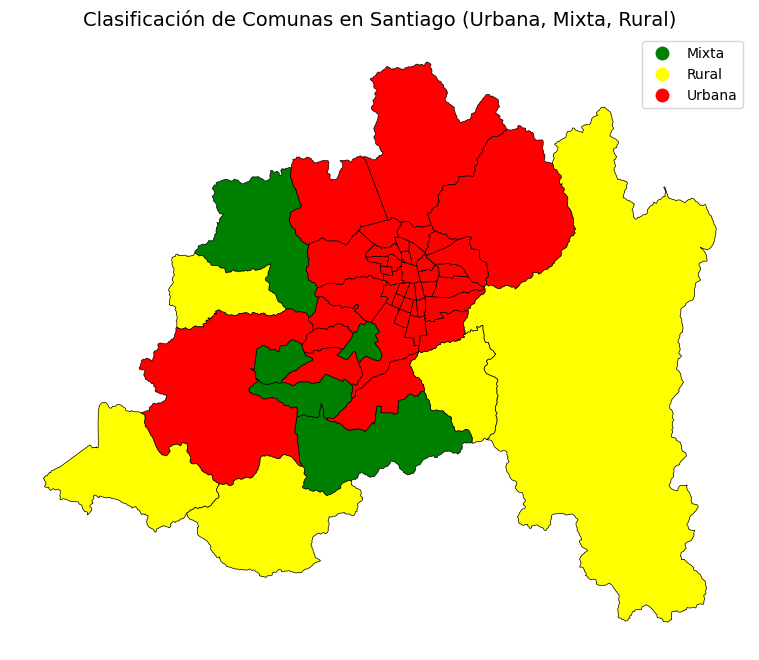

In [133]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Crear una paleta de colores personalizada
colores = ListedColormap(['green', 'yellow', 'red'])

# Pintar el mapa según la clasificación con bordes más marcados
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
mapa_comunas_clasificacion.plot(
    column='clasificacion_comuna',  # Columna para colorear
    cmap=colores,            # Usar la paleta personalizada
    legend=True,             # Mostrar la leyenda
    edgecolor='black',       # Bordes en color negro
    linewidth=0.5,           # Grosor de los bordes
    ax=ax                    # Ejes
)

# Título del mapa
plt.title('Clasificación de Comunas en Santiago (Urbana, Mixta, Rural)', fontsize=14)

ax.axis('off')
# Mostrar el mapa
plt.show()

